# Modeling work for RPG Game

In [2]:
#imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



## Load the data

Note that the database store has about 170 records from previous fights recorded a while ago

In [84]:
STORE = 'store.h5'
TABLE_KEY = 'events_df'

with pd.HDFStore(STORE) as store:
    src_df = store.get(TABLE_KEY)
    store.close()

#src_df.set_index('attack_id', inplace=True)

src_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169179 entries, 0 to 0
Data columns (total 57 columns):
att_attack_amt                 169179 non-null int64
att_base_attack_amt            169179 non-null int64
att_blocked                    169179 non-null int64
att_blocked_amt                169179 non-null int64
att_critical                   169179 non-null int64
att_dodged                     169179 non-null int64
att_enemy_base_hp              169179 non-null int64
att_enemy_hp                   169179 non-null int64
att_enemy_is_dead              169179 non-null int64
att_enemy_prev_hp              169179 non-null int64
att_event_time                 169179 non-null object
att_missed                     169179 non-null int64
att_overkill_amt               169179 non-null int64
attack_id                      169179 non-null int64
en_block_amount                169179 non-null float64
en_block_chance                169179 non-null float64
en_can_block                   169179 non

## Build test and train sets

In [87]:

landed_attack_bool = src_df.att_attack_amt > 0

df = src_df[landed_attack_bool]
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

### Build the model

In [104]:
model = LinearRegression(fit_intercept=False)

input_cols = ['player_critical_chance', 'att_base_attack_amt',
              'player_min_damage', 'player_max_damage', 'att_blocked',
              'att_critical', 'att_dodged', 'att_missed']

x_train = train[input_cols]
y_train = train[['att_attack_amt']]

x_test = test[input_cols]

model.fit(x_train, y_train)

x_train['predicted'] = model.predict(x_train)

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
pred = model.predict(test[input_cols])

test.loc[:, 'predicted'] = pred
print(test.loc[:,['att_attack_amt', 'predicted']].head())

    att_attack_amt   predicted
4               33   32.838497
6               40   42.831565
10              50   56.967244
18              24   19.872969
23             118  102.806058


C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


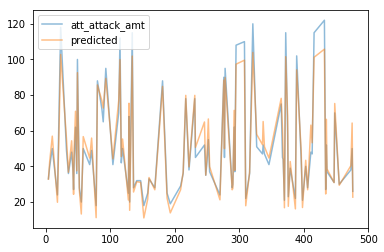

In [116]:
test[['att_attack_amt', 'predicted']].head(100).plot(alpha=.5);

In [117]:
train.head()

,att_attack_amt,att_base_attack_amt,att_blocked,att_blocked_amt,att_critical,att_dodged,att_enemy_base_hp,att_enemy_hp,att_enemy_is_dead,att_enemy_prev_hp,...,player_instance_id,player_legs_slot,player_level,player_main_hand_slot,player_max_damage,player_min_damage,player_miss_chance,player_name,player_off_hand_slot,player_shoulders_slot
0,41,41,0,0,0,0,14841,11587,0,11628,...,2120490967989956307,22,1,-99,49,18,0.05,Bruce,-99,21
1,38,38,0,0,0,0,13604,8665,0,8703,...,1205100327585918674,24,2,-99,49,18,0.05,Roman,-99,20
2,47,47,1,27,0,0,11169,5680,0,5700,...,1157539440297979602,24,2,-99,51,18,0.05,Oliver,-99,21
3,21,21,0,0,0,0,8892,4469,0,4490,...,31788895238041299,23,1,-99,45,17,0.05,Finn,-99,20
5,80,32,0,0,1,0,9700,4766,0,4846,...,1967807010920935123,22,1,-99,44,16,0.05,Conrad,-99,20


In [114]:
test.loc[:, ['att_attack_amt', 'predicted']].head()

C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,att_attack_amt,predicted
4,33,NaN
6,40,NaN
10,50,NaN
18,24,NaN
23,118,NaN


In [136]:
train.loc[:,'predicted'] = model.predict(train[input_cols])

train.loc[:,['att_attack_amt', 'predicted']].head(10)

C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,att_attack_amt,predicted
0,41,44.363411
1,38,40.041568
2,47,52.535364
3,21,16.445355
5,80,82.894070
7,17,11.032969
8,88,84.868822
9,31,29.124939
12,47,53.127661
13,100,92.542528


In [125]:
model.coef_

array([[-2.93330774,  1.44061419, -0.44130211, -0.12056477, -0.1426028 ,
        49.98142585,  0.        ,  0.        ]])

In [127]:
from pickle import dump, load

dump(model, open('p_attack_lr_v1.sav', 'wb'))

In [128]:
model2 = load(open('p_attack_lr_v1.sav', 'rb'))

pred = model2.predict(train[input_cols])

print(pred)

[[44.36341071]
 [40.04156812]
 [52.53536429]
 ...
 [41.5563293 ]
 [32.91264414]
 [76.86115059]]


In [129]:
print(train[input_cols].head())

   player_critical_chance  att_base_attack_amt  player_min_damage  \
0                    0.29                   41                 18   
1                    0.29                   38                 18   
2                    0.32                   47                 18   
3                    0.30                   21                 17   
5                    0.28                   32                 16   

   player_max_damage  att_blocked  att_critical  att_dodged  att_missed  
0                 49            0             0           0           0  
1                 49            0             0           0           0  
2                 51            1             0           0           0  
3                 45            0             0           0           0  
5                 44            0             1           0           0  


In [132]:
mod_test = np.array([0.29, 41, 18, 49, 0, 0, 0, 0])

print(model2.predict(mod_test[np.newaxis, :]))

[[44.36341071]]
